### Convert the audio files into text files  

In [1]:
import io
import time

In [2]:
from google.cloud import speech
speech_client = speech.Client()

audio_sample = speech_client.sample(
    source_uri='gs://mybucket201706/1.flac',
    encoding='FLAC',
    sample_rate_hertz=16000)

operation = audio_sample.long_running_recognize('en-US')

retry_count = 2400
while retry_count > 0 and not operation.complete:
    retry_count -= 1
    time.sleep(2)
    operation.poll()

if not operation.complete:
    print('Operation not complete and retry limit reached.')

alternatives = operation.results


In [3]:
nlp_output = ' '
for alternative in alternatives:
    nlp_output += '  {}'.format(alternative.transcript)
    nlp_output += '.\n'
print(nlp_output)

   creepy.
   PB.
   hello speaking hi Daniel can you give me a call from them I see how are you today but you a while back and leave it at once or organize your energy plan A couple of years ago to try and save you money on your bills remember that all that we put in place for his come up for a few so just hitting inside you still got to get a discount will be able to get you a better than one than what you currently on OK.
   if I should just let you know this cause of course equality in order purposes I before I do go into your account so just need to confirm sticking to the correct person so can you confirm your son and plays Daniel excellent on your address pass level 110 on 4029 for x-rays on your and locate a responsible for this account is that correct price that more recently.
   voltage drop off something is the electricity one and you know I like $3 a quarter $500.
   what's the Xbox check comes I'm driving yeah yeah alright you pay it like SSI much a fortnight is that what 

### Entity KeyWord Analysis

In [4]:
# Imports the Google Cloud client library
from google.cloud.gapic.language.v1beta2 import enums
from google.cloud.gapic.language.v1beta2 import language_service_client
from google.cloud.proto.language.v1beta2 import language_service_pb2
from google.cloud import language
import sys
import pandas as pd
from pandas import Series, DataFrame
import six  #provides utility functions for smoothing over the differences between the Python versions


In [5]:
language_client = language_service_client.LanguageServiceClient()
document = language_service_pb2.Document()
document.content = nlp_output.encode('utf-8')
document.type = enums.Document.Type.PLAIN_TEXT
encoding = enums.EncodingType.UTF32
result = language_client.analyze_entity_sentiment(document, encoding)

In [6]:
result.entities[19].mentions[0]

text {
  content: "power plan"
  begin_offset: 7118
}
type: COMMON
sentiment {
  magnitude: 0.10000000149011612
  score: -0.10000000149011612
}

In [7]:
entiti = []
sentiment_score = []
for entity in result.entities:
    for mention in entity.mentions:
        entiti.append(mention.text.content)
        sentiment_score.append(mention.sentiment.score)
        
df2 = pd.DataFrame({'EntityKeyWord': entiti, 'Sentiment':sentiment_score}, 
                   columns = ['EntityKeyWord', 'Sentiment'], index = None)
df2


frequency = df2['EntityKeyWord'].value_counts()[:20]
word_list = frequency.index

freq = DataFrame(frequency)

In [8]:
import numpy as np
sentiment_scores = df2[df2.EntityKeyWord.isin(word_list)]
frequency_sep = DataFrame(sentiment_scores.groupby(['EntityKeyWord', 'Sentiment']).size())
entity_sentiment = pd.merge(sentiment_scores, frequency_sep, left_on = ['EntityKeyWord', 'Sentiment'], 
                            right_index = True).drop_duplicates()

entity_sentiment.columns = ['EntityKeyWord', 'Sentiment','Frequency']
entity_sentiment.sort(['EntityKeyWord', 'Sentiment'], ascending=[1, 1], inplace = True)
entity_sentiment.index = np.arange(len(entity_sentiment))

entity_sentiment

/Users/jiaxihe/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,EntityKeyWord,Sentiment,Frequency
0,account,-0.3,1
1,account,-0.1,2
2,account,0.0,2
3,account,0.3,1
4,address,-0.3,1
5,address,0.0,3
6,address,0.1,1
7,anything,-0.2,1
8,anything,0.0,5
9,bill,0.0,15


### Sentiment Analysis

In [9]:
# Instantiates a client with they v1beta2 version
language_client = language.Client(api_version='v1beta2')
document = language_client.document_from_text(nlp_output, language='EN')

annotations = document.annotate_text(include_sentiment=True,
                                     include_syntax=False,
                                     include_entities=False)

In [10]:
score = annotations.sentiment.score
magnitude = annotations.sentiment.magnitude

sentence_no = []
sentiment = []
for index, sentence in enumerate(annotations.sentences):
    sentence_sentiment = sentence.sentiment.score
    sentence_no.append(index) 
    sentiment.append(sentence_sentiment)
    print('Sentence {} has a sentiment score of {}'.format(
            index, sentence_sentiment))
    

df = pd.DataFrame({'sentenceNum': sentence_no, 'sentiment':sentiment}, 
                 columns = ['sentenceNum', 'sentiment'], index = None)

Sentence 0 has a sentiment score of 0
Sentence 1 has a sentiment score of 0.6
Sentence 2 has a sentiment score of -0.1
Sentence 3 has a sentiment score of -0.1
Sentence 4 has a sentiment score of -0.1
Sentence 5 has a sentiment score of 0
Sentence 6 has a sentiment score of 0
Sentence 7 has a sentiment score of 0.3
Sentence 8 has a sentiment score of 0
Sentence 9 has a sentiment score of 0.1
Sentence 10 has a sentiment score of 0.1
Sentence 11 has a sentiment score of 0
Sentence 12 has a sentiment score of 0.2
Sentence 13 has a sentiment score of -0.3
Sentence 14 has a sentiment score of -0.4
Sentence 15 has a sentiment score of 0.1
Sentence 16 has a sentiment score of 0.1
Sentence 17 has a sentiment score of 0.6
Sentence 18 has a sentiment score of -0.1
Sentence 19 has a sentiment score of -0.5
Sentence 20 has a sentiment score of -0.4
Sentence 21 has a sentiment score of 0
Sentence 22 has a sentiment score of 0.1
Sentence 23 has a sentiment score of 0.1
Sentence 24 has a sentiment sc

In [11]:
df

,sentenceNum,sentiment
0,0,0.0
1,1,0.6
2,2,-0.1
3,3,-0.1
4,4,-0.1
5,5,0.0
6,6,0.0
7,7,0.3
8,8,0.0
9,9,0.1


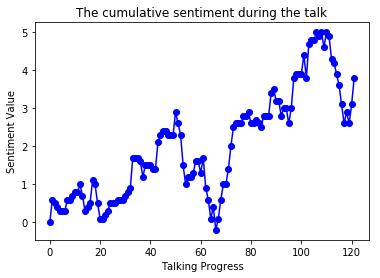

In [12]:
import matplotlib.pyplot as plt
from numpy.random import randn
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(df.sentenceNum, (df.sentiment).cumsum(), 'bo-')
ax.set_title('The cumulative sentiment during the talk')
ax.set_xlabel('Talking Progress')
ax.set_ylabel('Sentiment Value')